In [1]:
# Importing all the neccessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the iris dataset
iris_data = pd.read_csv('Iris.csv')
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# Let's see how many examples we have of each species
iris_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## EDA

In [4]:
iris_data.shape

(150, 6)

In [5]:
iris_data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [6]:
iris_data.isnull().sum() # No Null values in the data

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris_data.drop("Id", axis = 1, inplace = True) #Won't be needing Id for prediction

In [8]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

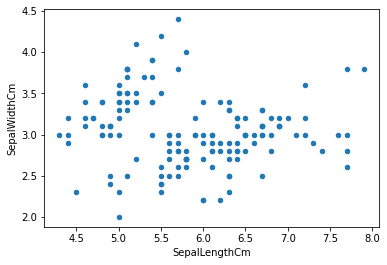

In [9]:
iris_data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

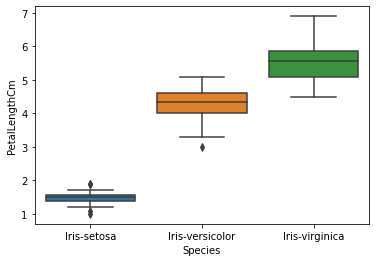

In [10]:
import seaborn as sns
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris_data)

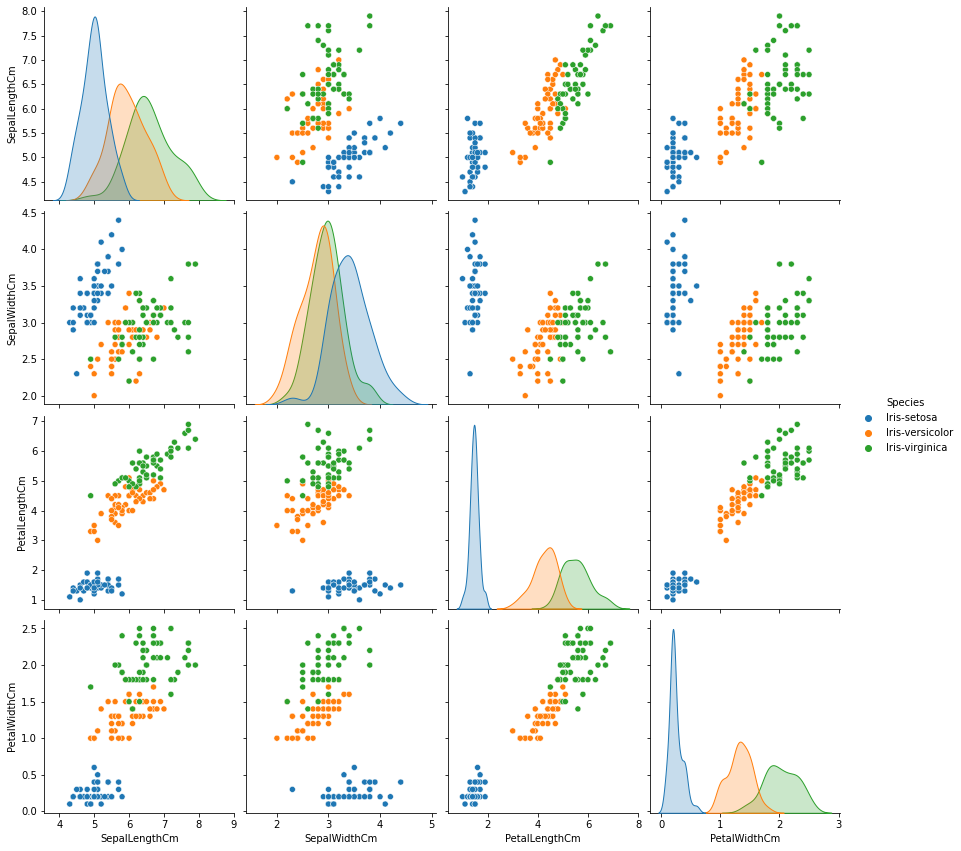

In [11]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation between each pair of features
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other two across all feature combinations
sns.pairplot( data = iris_data, hue="Species", size=3)

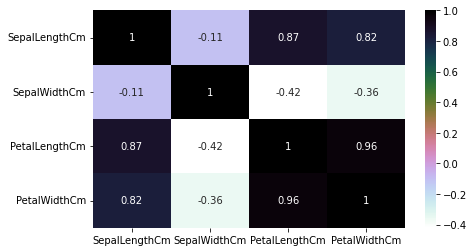

In [12]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris_data.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

Observation--->

The Sepal Width and Length are not correlated & The Petal Width and Length are highly correlated

## Label Encoder

In ML, we generally deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
iris_data['Species'] = le.fit_transform(iris_data['Species'])
iris_data.head(5)                                        

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Classes =[0,1,2]
#LabelEncoder assigns a unique number(starting from 0) to each class of data.
Class 0 =  Iris-setosa      
Class 1 = Iris-versicolor
Class 2 = Iris-virginica 

### Splitting data into train and test

In [15]:
from sklearn.model_selection import train_test_split
# 70% - train_data 
# 30% - test_data 
X = iris_data.drop(columns=['Species'])
y = iris_data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)

### Fitting the model using DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train,y_train,cv=5).mean()

0.9523809523809523

In [19]:
y_predictions= model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_predictions,y_test)

0.9555555555555556

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



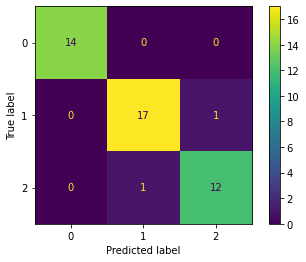

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)

In [25]:
#Testing for New points except from Dataset

Test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]]

print(model.predict(Test_point))

[1 1 1 0 1 1]


## Creating Decision tree with the help of DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

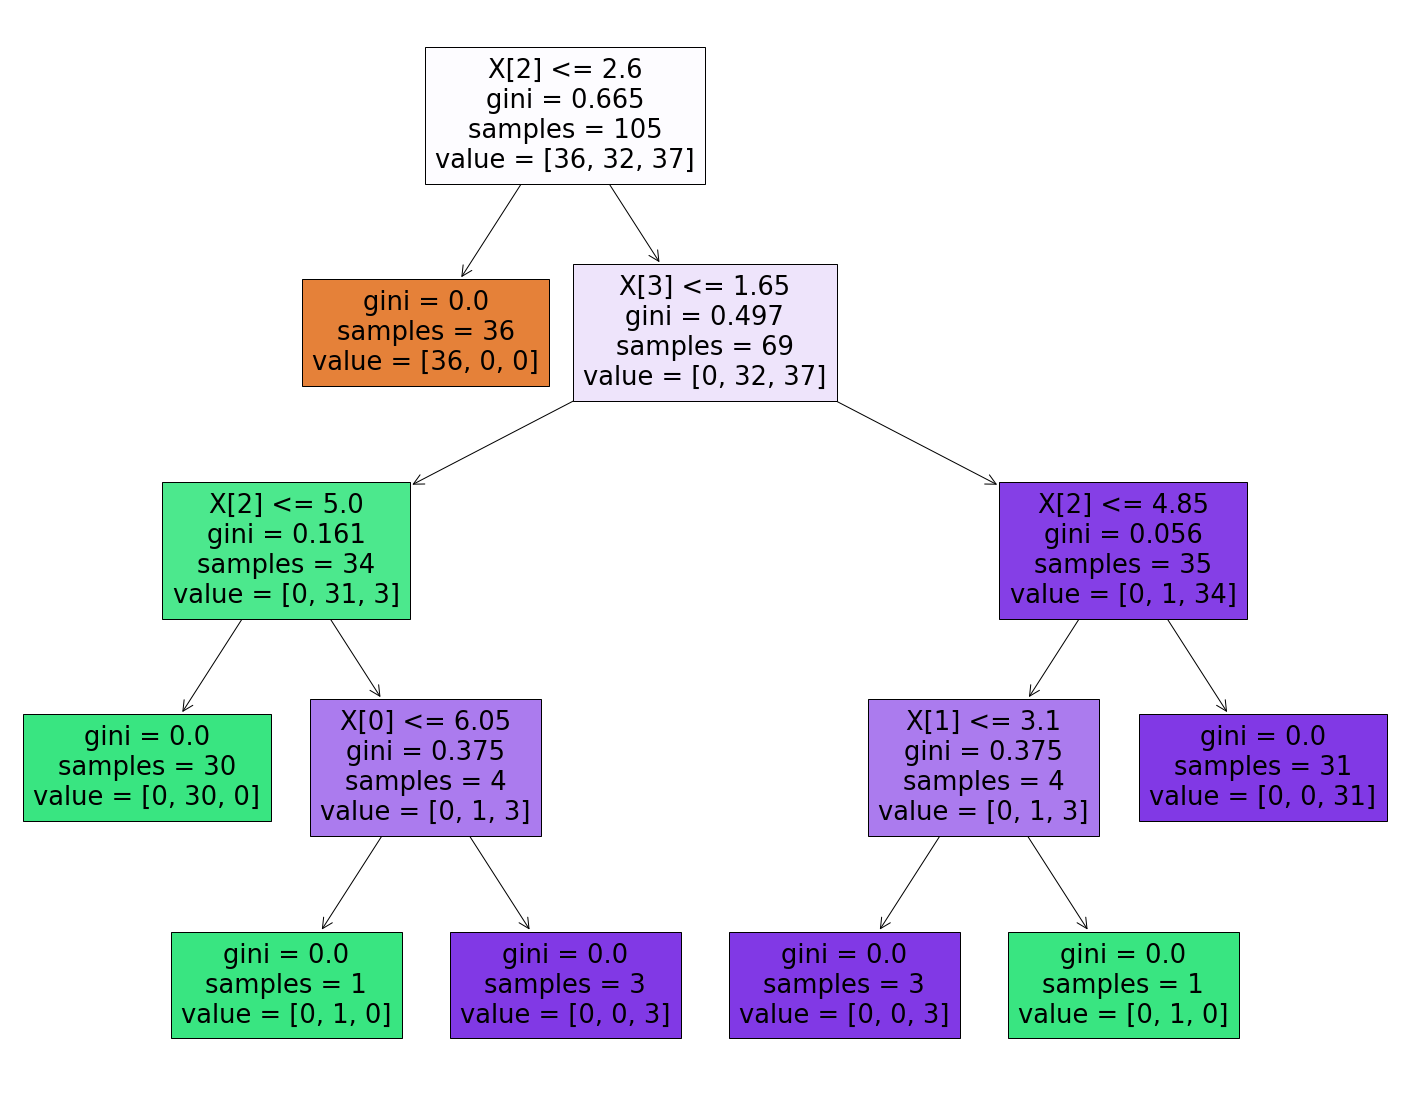

In [27]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model, filled=True)
plt.show()